<a href="https://colab.research.google.com/github/ciccmeek/Michael-Ciccarelli-FNCE-Python/blob/main/finalexam_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import all the necessary packages.  **[2 points]**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (3).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['UCI_Credit_Card (3).csv']))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Rename the dependent variable:

In [ ]:
#renaming the dependent variable
df['IsDefaulter'] =df['default.payment.next.month']
df = df.drop('default.payment.next.month',axis = 1)

#renaming a few other independent variables
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# **EXPLORATORY DATA ANALYSIS**  **[05 points]**

2. What is the size of the dataset? What do the columns tell you? That is, what are the features?

3. Print the summary statistics. On Brightspace, describe your findings (in around 4-5 lines). What trends do you notice? Any anomaly? Does anything stick out as being strange?

In [ ]:
# size
print(f"Dataset Shape: {df.shape}")

#Column Info
df.info()

#summary STats

print(df.describe())

df.head()

Dataset Shape: (30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             30000 non-null  int64  
 1   LIMIT_BAL      30000 non-null  float64
 2   SEX            30000 non-null  int64  
 3   EDUCATION      30000 non-null  int64  
 4   MARRIAGE       30000 non-null  int64  
 5   AGE            30000 non-null  int64  
 6   PAY_SEPT       30000 non-null  int64  
 7   PAY_AUG        30000 non-null  int64  
 8   PAY_JUL        30000 non-null  int64  
 9   PAY_JUN        30000 non-null  int64  
 10  PAY_MAY        30000 non-null  int64  
 11  PAY_APR        30000 non-null  int64  
 12  BILL_AMT_SEPT  30000 non-null  float64
 13  BILL_AMT_AUG   30000 non-null  float64
 14  BILL_AMT_JUL   30000 non-null  float64
 15  BILL_AMT_JUN   30000 non-null  float64
 16  BILL_AMT_MAY   30000 non-null  float64
 17  BILL_AMT_APR   30000 no

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 4. How would you deal with **missing values**? HINT: look at the education variable and what each category means in the definitions list that I have provided you with.

##### Explain what you do with missing values. Do you drop them, or ignore them, or impute them with the average, or put them into fewer buckets? Explain your reasoning. **Check** if **other variables** require the same treatment or not.  **[5 points]**

In [ ]:
#Missing Values in education, grouping into one catergory
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 6: 4})

#Missing values for variables with the mode
df['MARRIAGE'].fillna(df['MARRIAGE'].mode()[0], inplace=True)
df['SEX'].fillna(df['SEX'].mode()[0], inplace=True)

#Numerical using median to avoid outliers
df['LIMIT_BAL'].fillna(df['LIMIT_BAL'].median(), inplace=True)

#for missing repayment status
repayment_cols = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
df[repayment_cols] = df[repayment_cols].fillna(-1)

#Check for more missing values
print(df.isnull().sum())

ID               0
LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_SEPT         0
PAY_AUG          0
PAY_JUL          0
PAY_JUN          0
PAY_MAY          0
PAY_APR          0
BILL_AMT_SEPT    0
BILL_AMT_AUG     0
BILL_AMT_JUL     0
BILL_AMT_JUN     0
BILL_AMT_MAY     0
BILL_AMT_APR     0
PAY_AMT_SEPT     0
PAY_AMT_AUG      0
PAY_AMT_JUL      0
PAY_AMT_JUN      0
PAY_AMT_MAY      0
PAY_AMT_APR      0
IsDefaulter      0
dtype: int64


<ipython-input-13-5208969d4c97>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MARRIAGE'].fillna(df['MARRIAGE'].mode()[0], inplace=True)
<ipython-input-13-5208969d4c97>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

### Similarly, check for **outliers** and deal with them accordingly.

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check outliers in key financial columns
outlier_columns = ['LIMIT_BAL', 'BILL_AMT_SEPT', 'PAY_AMT_SEPT']
for col in outlier_columns:
    print(f"Outliers in {col}: {len(detect_outliers_iqr(df, col))}")


for col in outlier_columns:
    df[col] = np.where(df[col] > df[col].quantile(0.95), df[col].quantile(0.95), df[col])
    df[col] = np.where(df[col] < df[col].quantile(0.05), df[col].quantile(0.05), df[col])

# Verify changes
print(df[outlier_columns].describe())

Outliers in LIMIT_BAL: 167
Outliers in BILL_AMT_SEPT: 2400
Outliers in PAY_AMT_SEPT: 2745
           LIMIT_BAL  BILL_AMT_SEPT  PAY_AMT_SEPT
count   30000.000000   30000.000000  30000.000000
mean   164226.589333   46806.994133   3996.888267
std    120832.017727   57457.842200   4773.919957
min     20000.000000       0.000000      0.000000
25%     50000.000000    3558.750000   1000.000000
50%    140000.000000   22381.500000   2100.000000
75%    240000.000000   67091.000000   5006.000000
max    430000.000000  201203.050000  18428.200000


### 5. What is the **probability of default**?  **[3 points]**

In [ ]:
default_rate = df['IsDefaulter'].mean()
print(f"Probability of default: {default_rate:.2%}")

Probability of default: 22.12%


### 6. Create a few charts like count of default, and sex, education, marriage, and age versus default. These can be bar charts, pie charts, whatever you like. You can select other variables as per your liking too.  **[10 points]**

<ipython-input-16-bc0835e34d0a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['IsDefaulter'], palette=['green', 'red'])


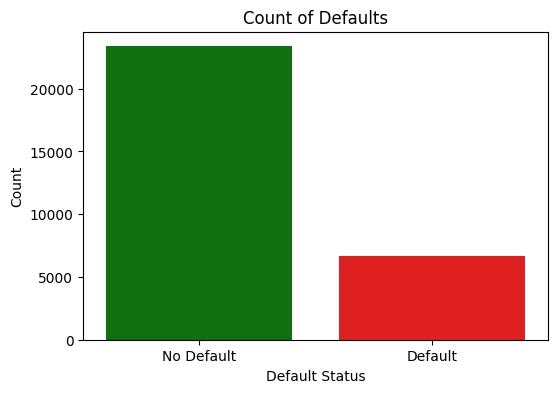

In [ ]:
# Count plot for default status
plt.figure(figsize=(6, 4))
sns.countplot(x=df['IsDefaulter'], palette=['green', 'red'])
plt.xticks([0, 1], ['No Default', 'Default'])
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.title("Count of Defaults")
plt.show()

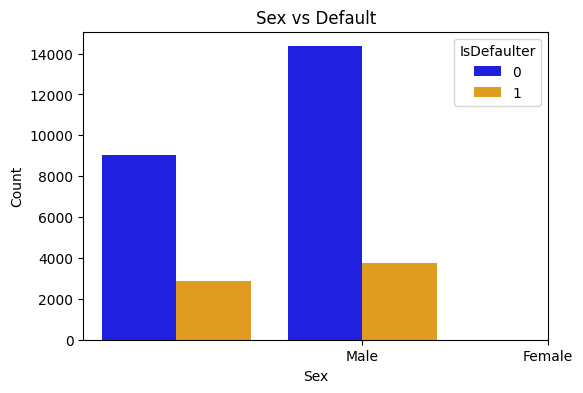

In [ ]:
# Bar plot for Sex vs Default
plt.figure(figsize=(6, 4))
sns.countplot(x=df['SEX'], hue=df['IsDefaulter'], palette=['blue', 'orange'])
plt.xticks([1, 2], ['Male', 'Female'])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex vs Default")
plt.show()

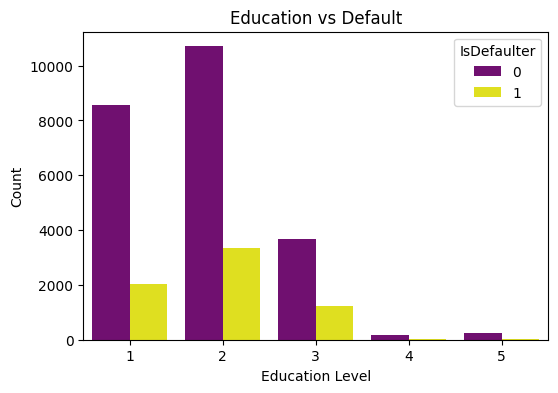

In [ ]:
# Education vs Default
plt.figure(figsize=(6, 4))
sns.countplot(x=df['EDUCATION'], hue=df['IsDefaulter'], palette=['purple', 'yellow'])
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education vs Default")
plt.show()

## I am first goint to balance the imbalanced dataset. Next, I have created a column which is the sum of all payments made by each consumer.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

columns = list(df.columns)
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['IsDefaulter'] = y_smote
df_fr = balance_df.copy()
df_fr['Payment_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

Original dataset shape 30000
Resampled dataset shape 46728


### 7. What is the payment value and dues value of a defaulter versus a non-defaulter, on average? Show me a boxplot and indicate if there is a difference.  **[4 points]**

<ipython-input-20-b5e81431a6a0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_fr['IsDefaulter'], y=df_fr['Payment_Value'], palette=['green', 'red'], ax=axes[0])
<ipython-input-20-b5e81431a6a0>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No Default', 'Default'])
<ipython-input-20-b5e81431a6a0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_fr['IsDefaulter'], y=df_fr['Dues'], palette=['blue', 'orange'], ax=axes[1])
<ipython-input-20-b5e81431a6a0>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

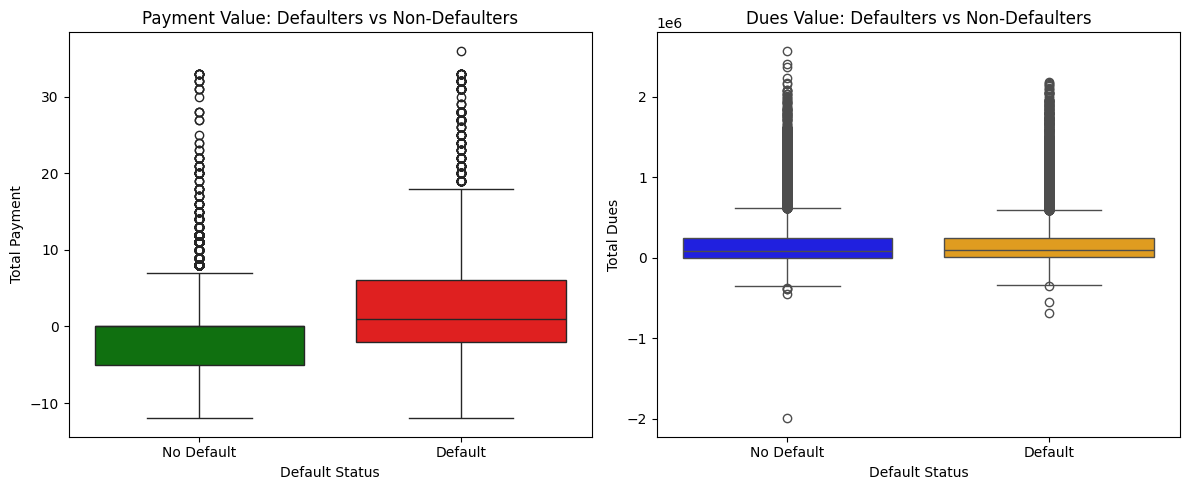

In [ ]:
# boxplots for Payment Value and Dues
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Payment value boxplot
sns.boxplot(x=df_fr['IsDefaulter'], y=df_fr['Payment_Value'], palette=['green', 'red'], ax=axes[0])
axes[0].set_xticklabels(['No Default', 'Default'])
axes[0].set_title("Payment Value: Defaulters vs Non-Defaulters")
axes[0].set_xlabel("Default Status")
axes[0].set_ylabel("Total Payment")

# Dues boxplot
sns.boxplot(x=df_fr['IsDefaulter'], y=df_fr['Dues'], palette=['blue', 'orange'], ax=axes[1])
axes[1].set_xticklabels(['No Default', 'Default'])
axes[1].set_title("Dues Value: Defaulters vs Non-Defaulters")
axes[1].set_xlabel("Default Status")
axes[1].set_ylabel("Total Dues")

plt.tight_layout()
plt.show()

### 8. Convert your sex, education, and marriage columns to string variables, and then **'one-hot-encode'** them.  **[6 points]**

#### The process for 'sex' shown to you as an example:

In [ ]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True)
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True)
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_fr = df_fr.replace(encoders_nums)
df_fr.head()

<ipython-input-24-140025da5af5>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fr = df_fr.replace(encoders_nums)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payment_Value,Dues
0,1,20000.0,0,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,3913.0
1,2,120000.0,0,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,10352.0
2,3,90000.0,0,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,76608.0
3,4,50000.0,0,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,174713.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,44620.0


In [ ]:
# convert
df_fr.replace({'SEX': {1: 'MALE', 2: 'FEMALE'},
               'EDUCATION': {1: 'GRADUATE SCHOOL', 2: 'UNIVERSITY', 3: 'HIGH SCHOOL', 4: 'OTHER'},
               'MARRIAGE': {1: 'MARRIED', 2: 'SINGLE', 3: 'OTHER'}}, inplace=True)

# Verify
print(df_fr[['SEX', 'EDUCATION', 'MARRIAGE']].head())

    SEX   EDUCATION MARRIAGE
0     0  UNIVERSITY  MARRIED
1     0  UNIVERSITY   SINGLE
2     0  UNIVERSITY   SINGLE
3     0  UNIVERSITY  MARRIED
4  MALE  UNIVERSITY  MARRIED


In [ ]:
# Onehot
df_fr = pd.get_dummies(df_fr, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)
print(df_fr.head())

   ID  LIMIT_BAL  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
0   1    20000.0   24         2        2       -1       -1       -2       -2   
1   2   120000.0   26        -1        2        0        0        0        2   
2   3    90000.0   34         0        0        0        0        0        0   
3   4    50000.0   37         0        0        0        0        0        0   
4   5    50000.0   57        -1        0       -1        0        0        0   

   BILL_AMT_SEPT  ...  Payment_Value      Dues  SEX_MALE  \
0         3913.0  ...             -2    3913.0     False   
1         2682.0  ...              3   10352.0     False   
2        29239.0  ...              0   76608.0     False   
3        46990.0  ...              0  174713.0     False   
4         8617.0  ...             -2   44620.0      True   

   EDUCATION_GRADUATE SCHOOL  EDUCATION_HIGH SCHOOL  EDUCATION_OTHER  \
0                      False                  False            False   
1             

### 9. Now, ML.  **[5 points]**

First, Standardize your data, shuffle it, and divide it into the train-test-split samples. Choose a split of your choice.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardize
features = df_fr.drop(columns=['IsDefaulter'])
target = df_fr['IsDefaulter']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Shuffle
np.random.seed(42)
shuffle_indices = np.random.permutation(len(features_scaled))
features_scaled = features_scaled[shuffle_indices]
target = target.iloc[shuffle_indices].reset_index(drop=True)

# Train-Test
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Verify
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 37382, Testing samples: 9346


### 9a. Logistic Regression. **[10 points]**
  - run logistic regression.
  - calculate accuracy.
  - print the confusion matrix.
  - plot feature importance.
  - get the classification report.
  - plot the ROC-AUC curve.

In [ ]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_scaled)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

In [ ]:
# train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
# train model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2%}")

Logistic Regression Accuracy: 72.72%


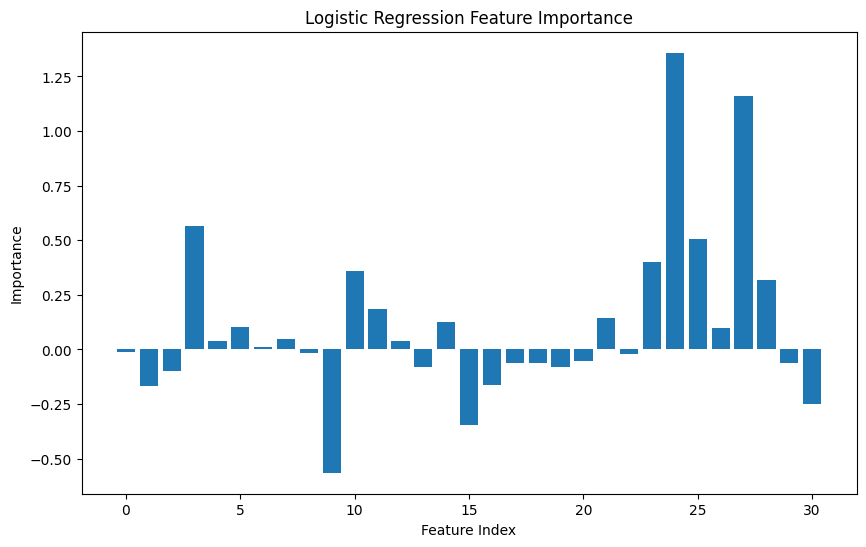

In [ ]:
importance = model.coef_[0]

plt.figure(figsize=(10,6))
plt.bar(range(len(importance)), importance)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Logistic Regression Feature Importance")
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      4685
           1       0.72      0.74      0.73      4661

    accuracy                           0.73      9346
   macro avg       0.73      0.73      0.73      9346
weighted avg       0.73      0.73      0.73      9346



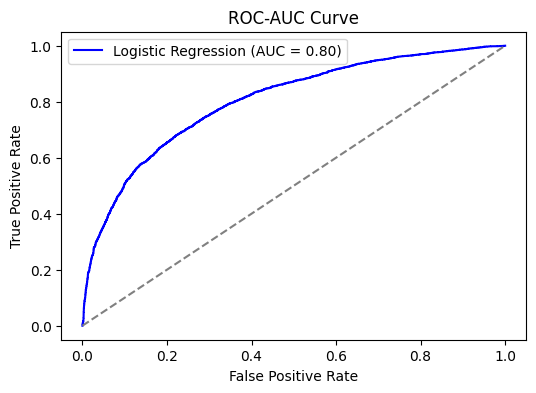

In [ ]:
# Compute ROC curve
from sklearn.metrics import roc_curve, auc
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

## Repeat the above steps with all the supervised ML techniques that you are familiar with:

#### 9b. Decision Tree                        **[10 points]**
#### 9c. Random Forest                        **[10 points]**
#### 9d. K-Nearest Neighbors                  **[10 points]**
#### 9e. Support Vector Machine (NEW method)  **[10 points]**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2%}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 75.79%
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      4685
           1       0.75      0.77      0.76      4661

    accuracy                           0.76      9346
   macro avg       0.76      0.76      0.76      9346
weighted avg       0.76      0.76      0.76      9346



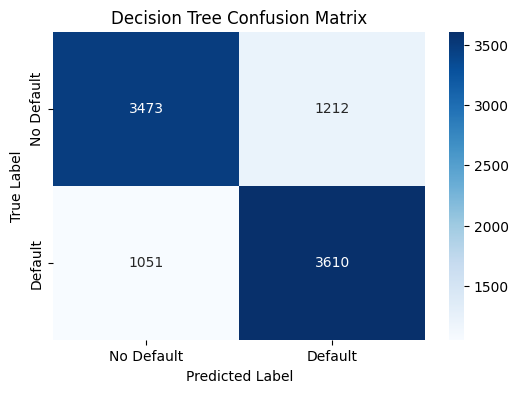

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      4685
           1       0.75      0.77      0.76      4661

    accuracy                           0.76      9346
   macro avg       0.76      0.76      0.76      9346
weighted avg       0.76      0.76      0.76      9346



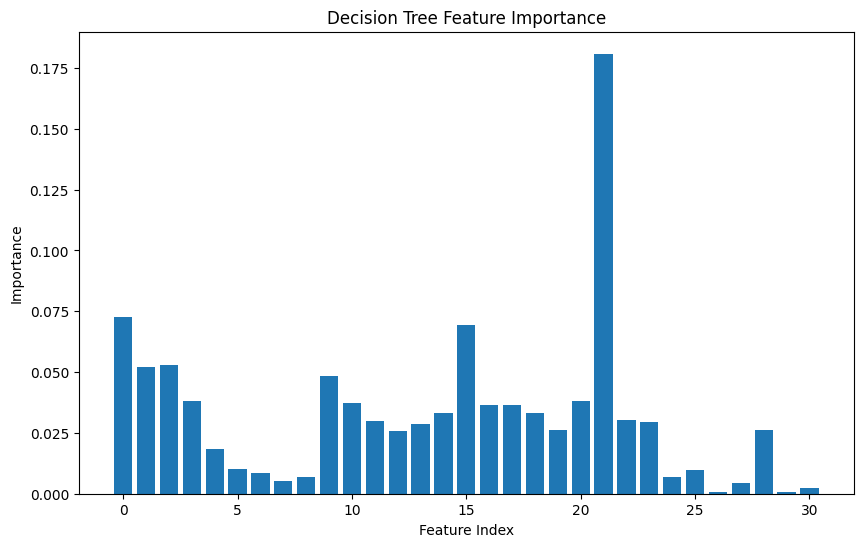

In [ ]:
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

plt.figure(figsize=(10,6))
importance = dt_model.feature_importances_
plt.bar(range(len(importance)), importance)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

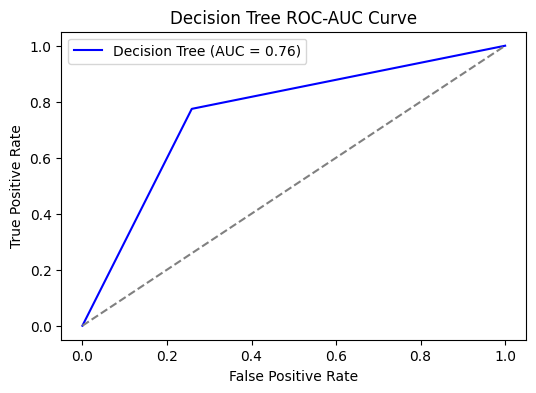

In [ ]:
# ROC-AUC Curve
plt.figure(figsize=(6,4))
y_probs_dt = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC-AUC Curve")
plt.legend()
plt.show()

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2%}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 84.30%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      4685
           1       0.86      0.82      0.84      4661

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



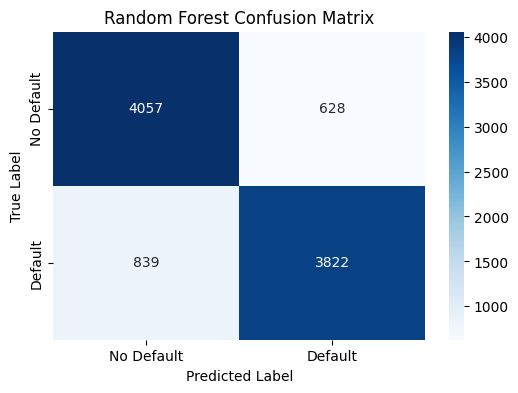

In [ ]:
# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

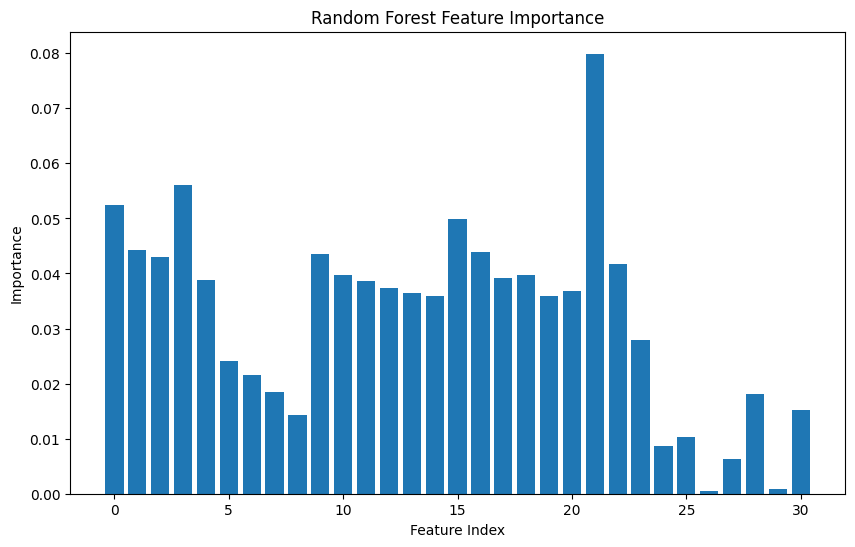

In [ ]:
# Feature Importance
plt.figure(figsize=(10,6))
importance = rf_model.feature_importances_
plt.bar(range(len(importance)), importance)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

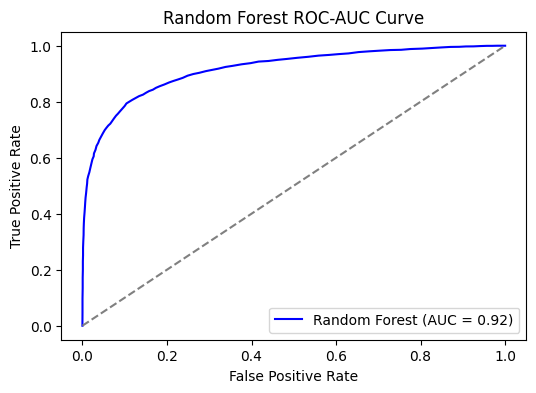

In [ ]:
# ROC curve
y_probs_rf = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC-AUC Curve")
plt.legend()
plt.show()

In [ ]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2%}")
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 75.93%
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      4685
           1       0.75      0.78      0.76      4661

    accuracy                           0.76      9346
   macro avg       0.76      0.76      0.76      9346
weighted avg       0.76      0.76      0.76      9346



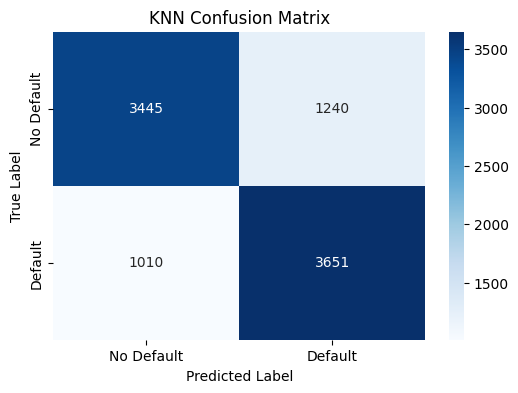

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix")
plt.show()

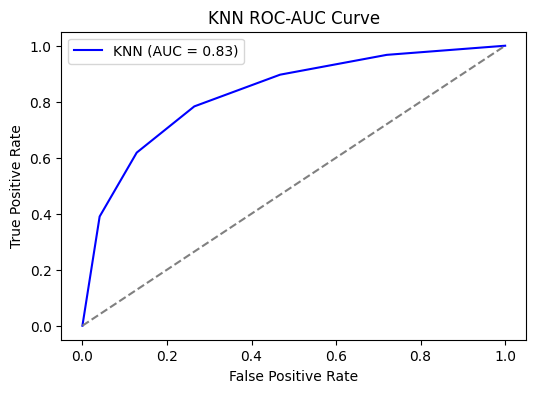

In [ ]:
# ROC curve
y_probs_knn = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_knn:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC-AUC Curve")
plt.legend()
plt.show()